# **Práctica 5: Linear Models and correlation**

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df = pd.read_csv("Video_Games_Sales_Cleaned.csv")
df


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16286,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16287,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16288,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16289,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


# Correlación entre ventas regionales y globales
Calculamos la matriz de correlación y graficamos

Matriz de correlación:
              NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
NA_Sales      1.000000  0.768923  0.451283     0.634518      0.941269
EU_Sales      0.768923  1.000000  0.436379     0.726256      0.903264
JP_Sales      0.451283  0.436379  1.000000     0.290559      0.612774
Other_Sales   0.634518  0.726256  0.290559     1.000000      0.747964
Global_Sales  0.941269  0.903264  0.612774     0.747964      1.000000


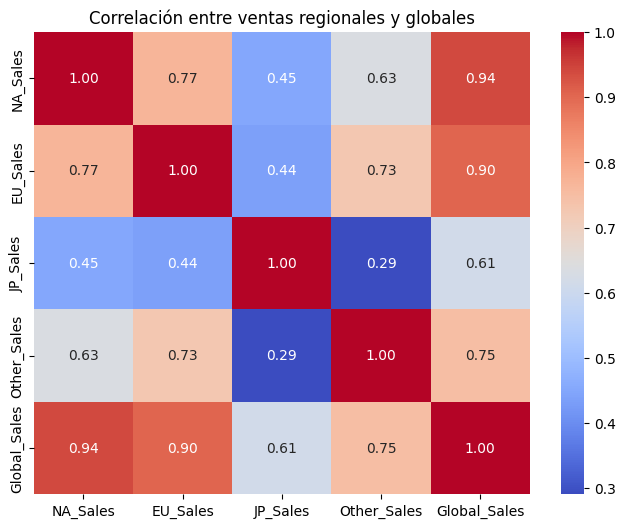

In [32]:
# matriz de correlación
corr = df[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]].corr()

print("Matriz de correlación:")
print(corr)

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlación entre ventas regionales y globales")
plt.show()


# Modelo Lineal Simple
Elegimos nuestras variables (JP_Sales como predictor y Global_Sales somo dependiente)

In [33]:
X = df[["JP_Sales"]]
y = df["Global_Sales"]

# Ajustar modelo
model_simple = LinearRegression()
model_simple.fit(X, y)


LinearRegression()

Hacemos las predicciones y obtenemos el R2 score

In [34]:
y_pred_simple = model_simple.predict(X)

r2_simple = r2_score(y, y_pred_simple)

print("Modelo simple: Global_Sales ~ JP_Sales")
print(f"Ecuación: Global_Sales = {model_simple.intercept_:.3f} + {model_simple.coef_[0]:.3f} * JP_Sales")
print(f"R2 = {r2_simple:.4f}")

Modelo simple: Global_Sales ~ JP_Sales
Ecuación: Global_Sales = 0.298 + 3.079 * JP_Sales
R2 = 0.3755


Graficamos

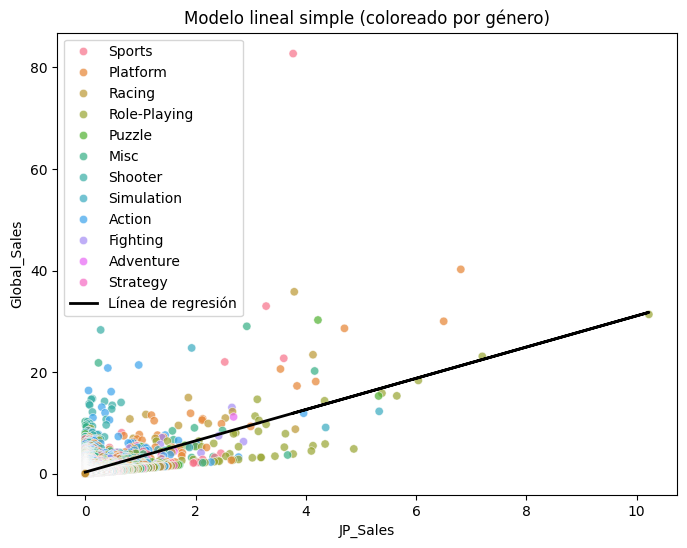

In [40]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="JP_Sales", y="Global_Sales", data=df, hue="Genre", alpha=0.7)
plt.plot(df["JP_Sales"], y_pred_simple, color="black", linewidth=2, label="Línea de regresión")
plt.xlabel("JP_Sales")
plt.ylabel("Global_Sales")
plt.title("Modelo lineal simple (coloreado por género)")
plt.legend()
plt.show()

# Modelo Lineal Múltiple (todas las regiones)
Ahora tomaremos en cuenta todas las regiones para la variable predictor

In [37]:
X_multi = df[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]
y = df["Global_Sales"]

model_multi = LinearRegression()
model_multi.fit(X_multi, y)

y_pred_multi = model_multi.predict(X_multi)

r2_multi = r2_score(y, y_pred_multi)

print("Modelo múltiple: Global_Sales ~ NA_Sales + EU_Sales + JP_Sales + Other_Sales")
print("Intercepto:", round(model_multi.intercept_, 3))
print("Coeficientes:", dict(zip(X_multi.columns, model_multi.coef_.round(3))))
print(f"R2 = {r2_multi:.6f}")


Modelo múltiple: Global_Sales ~ NA_Sales + EU_Sales + JP_Sales + Other_Sales
Intercepto: 0.0
Coeficientes: {'NA_Sales': np.float64(1.0), 'EU_Sales': np.float64(1.0), 'JP_Sales': np.float64(1.0), 'Other_Sales': np.float64(1.0)}
R2 = 0.999989


Como podemos ver el valor de R2 es muy cercano a 1, esto se debe a que "Global_Sales" es la suma de todas las columnas (regiones)

Gráfica para el modelo lineal múltiple

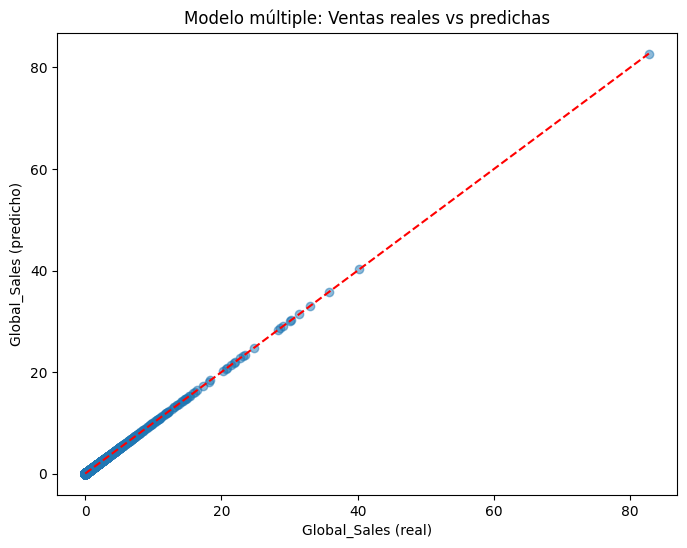

In [42]:
plt.figure(figsize=(8,6))
plt.scatter(y, y_pred_multi, alpha=0.5)
plt.xlabel("Global_Sales (real)")
plt.ylabel("Global_Sales (predicho)")
plt.title("Modelo múltiple: Ventas reales vs predichas")
plt.plot([0, max(y)], [0, max(y)], color="red", linestyle="--")
plt.show()


# Gráfico con residuales
Utilizamos este grafico para ver si hay errores (lo ideal es que los puntos estén cerca de 0)

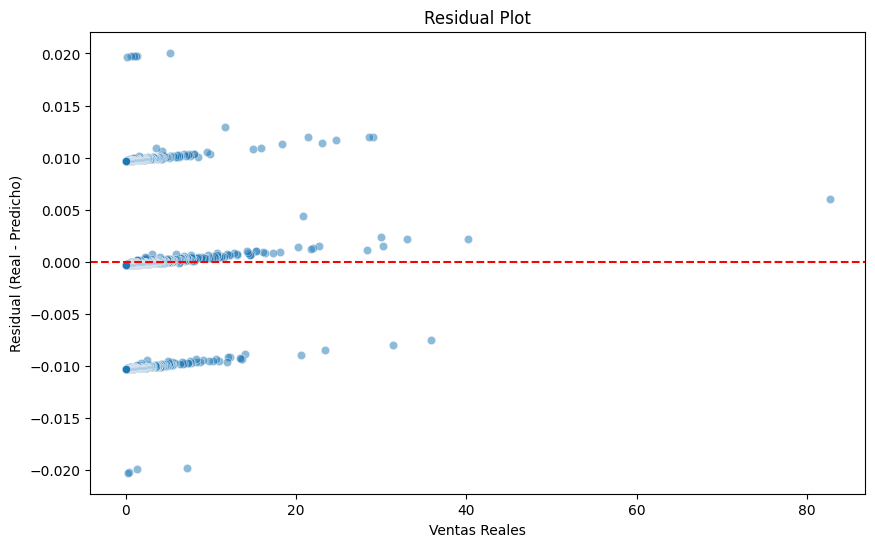

In [46]:
residuals = y - y_pred_multi
plt.figure(figsize=(10,6))
sns.scatterplot(x=y, y=residuals, alpha=0.5)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Ventas Reales")
plt.ylabel("Residual (Real - Predicho)")
plt.title("Residual Plot")
plt.show()